In [1]:
#Importing necessary files 

import cv2 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Reading the image 'Problem statement'

img = cv2.imread('Problem statement.png') 

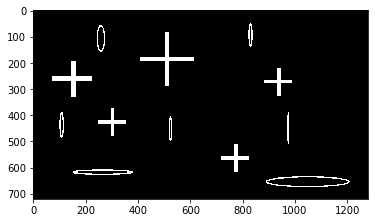

In [3]:
# Convert to RGB
image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)    

# Convert to Grayscale
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)  

# Create a binary thresholded image
_, binary = cv2.threshold(gray, 10, 255, cv2.THRESH_BINARY_INV)

# Display the Image
plt.imshow(binary, cmap="gray") 



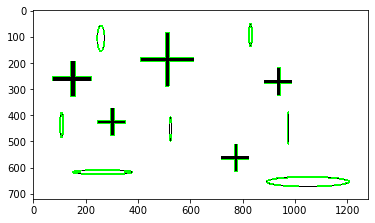

In [4]:
# Contours in the image
contours, hierarchy = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

#Drawing the contours on the images
Image = cv2.drawContours(image, contours, -1, (0, 255, 0), 2)
plt.imshow(Image)

In [5]:
# To check whether the contour is a cross or not
IsCross=[]                        
for i in range(len(contours)):
    x,y,w,h = cv2.boundingRect(contours[i])
    if (len(contours[i])==16 and (abs(h-w) < 20)) :  # a cross has breadth and height of the bounding box almost equal 
                                                     # and the points of the contours are always equal to 16 in case of a cross
                                                     # Using the above properties to find out whether the figure is a cross or not
        IsCross.append(1)     # if yes then '1' is stored
    else:
        IsCross.append(0)     # else '0' is stored

In [6]:
X=[]
Y=[]
for i in range(len(contours)):
    if IsCross[i] == 1 : 
        M = cv2.moments(contours[i])         # Calculate the moments of the contours
        Y.append(int(M["m10"] / M["m00"]))   # By using moments calculating the X Co-ordinate of Centroid of that contour
        X.append(int(M["m01"] / M["m00"]))   # Similarly calculating the Y Co-ordinate of Centroid of that contour
    else:
        pass

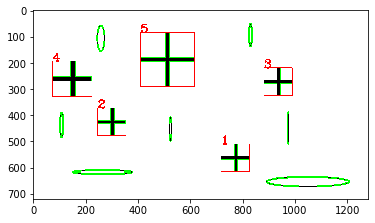

In [7]:
count=1
for i in range(len(contours)):
    if IsCross[i] == 1:
        x,y,w,h = cv2.boundingRect(contours[i])
        img=cv2.rectangle(Image,(x,y),(x+w,y+h),(255,0,0),2)     # Drawing the bounding box on the cross
        cv2.putText(img,str(count),(x,y),cv2.FONT_HERSHEY_COMPLEX,1.5,(255,0,0),3)  # Wrtitng the Index number of the Cross
        count+=1
plt.imshow(img)        # Display final Image

In [8]:
Coordinates=list(zip(Y, X))
Coordinates                       # Co-ordinates of Centroid of Cross respective to their Index given in Displayed Image

[(772, 562), (301, 425), (936, 272), (150, 261), (512, 187)]